##  <center>Basin Hopping optimization of LJ Clusters

![Image of Basin Hopping Transformation](https://www.hindawi.com/journals/aai/2012/674832.fig.001b.jpg)

## <Center>INTRODUCTION

<p>The Lennard Jones potential is a simple mathematical model that approximates the atomic interactions between neutral atoms.<sup>[5]<sup><p>
<p>This was first proposed in 1924 by John Lennard-Jones, a British mathematician and theoretical physicist.  Recently, Lennard-Jones clusters have been of great interest to computational scientists, specificcally their structural, thermodynamic and dynamic properties<sup>[1]<sup><p>

The Lennard-Jones equation in its most common form is given by
$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$

<p>Where $\epsilon$ is the depth of the potential well and $\delta$ is the distance at which the potential crosses zero for the interatomic interation while $r$ is the distance between two atoms.  Here both $\epsilon$ and $\delta$ are set to $1$ for simplicity.<p>
<p>Recently, Lennard-Jones clusters have been of great interest to computational scientists, specifically their structural, thermodynamic and dynamic properties<sup>[1]<sup><p>
<p>To extract these properties of Lennard-Jones clusters, many global optimization technqiues have been implimented.<p>


## <center>GLOBAL OPTIMIZATION OF LENNARD-JONES CLUSTERS

<p>Various optimization techniques have been implimented with great success in finding the potential energy minimums of Lennard-Jones clusters.  A commonly used technique is Basin-Hopping due to its efficiency.<sup>[3]<sup><p>

<p>Basin-Hopping minimization implements a transformation to the space of interest by changing the geometry to a series of "inter penetrating staircases" without changing the values of the minima themselves, effectively creating a basin at the global minima.<sup>[3]<sup><p>

<p>When applying Basin-Hopping to Lennard-Jones clusters, the geometry of the potential energy space is transformed into a series of "stairs" as shown below.  This eliminates the barriers that the potential enery landscape imposes allowing for an easier compuation of minima.<p>

![Image of Basin Hopping Transformation](https://www.researchgate.net/profile/David_Wales2/publication/5303017/figure/fig1/AS:280493384847360@1443886242020/FIG-1-In-the-basin-hopping-approach-the-original-potential-energy-surface-solid-is.png)

<p>Basin-Hopping has been implimented in scipy as a stochastic algorithm with an acceptance test based on a Monte Carlo algorithm.  Since the algorithm is stochastic for consistency, it must be iterative in nature as there is no way to determine if the computed value for the minimum is the true global minimum.<sup>[2]<sup><p>

There are three parameters to adjust when utilizing the Basin-Hopping algorithm to compute global minima.

<p>The first being the temperature which must be in porportion to the difference in extrema values.
The second being the step size, which controls exactly how far the random number can generate away from the previous location at any given iteration.
While the third is the number of iterations.<sup>[3]<sup><p>

<p> The first two parameters, temperature and step size, must be set in relation to the potential energy landscape.  For the case of Lennard-Jones clusters, a forest diagram is used to infer the necessary parameters that will most efficiently lead to a global minimum computation. <p>

## <center>Experiment

Below is the python code used to impliment basin-hopping to Lennard-Jones potentials, the code is highly vectorized and a little difficult to understand. The highly vectorized portions are carefully explained in their function.  

I will attempt to relate the parameters that may lead to an efficient computation of global minimum to the geometries of the potential energy space of the cluster as well as the physical geometry of the cluster.

<p>The physical geometry figures and true global minimums were generated using the Cambridge resource<sup>[4]<sup><p>

In [138]:
def init_pos(N_atoms,L=5):
    '''Generates the cartesian coordinates of N_atoms for Lennard Jones clusters'''
    
    import numpy as np
    return L*np.random.random_sample(N_atoms*3)
    
    
def LjN(N_atom,iterations,Temp,Step):
    '''Utilizes total energy and position functions in conjunction with the basin
    hopping algorithm in order to find the minimums of the potential energy landscape of a
    Lennard Jones cluster of N_atoms in a given number of iterations.
    The Temp and Step parameters of this function will need to be changed with regard to the size
    and geometry of the cluster'''
    
    import numpy as np
    from scipy.optimize import basinhopping


    def Total_Energy(pos):
        '''A vectorized function that computes the cartesian distance between each atom in the
        Lennard Jones cluster in order to find the total potential of of the cluster in question'''
        
        
        from scipy.spatial.distance import cdist
        pos = np.reshape(pos,[N_atom,3])  # reshapes to a N_atom x 3 array to describe the cartesian coordiantes for each row
        distance = cdist(pos,pos,'euclidean')  # computes the euclidean distance between all atoms in the cluster
        iu1 = np.triu_indices(N_atom) # the previous step returns a distance matrix which we only need the upper triangular
        distance = distance[iu1]  # this removes all other elements except that upper triangular matrix
        index = np.argwhere(distance==0) # this removes the distance of an atom to itself
        distance = np.delete(distance,index)
        r6 = np.power(distance,6)  # LJ potential computation
        r12 = np.multiply(r6,r6)
        E= 4*(1/r12 - 1/r6)  # returns an array of potentials for each distance pair
        Energy = np.sum(E)  # sums the previous array to compute the total potential
        return Energy
    
    pos = init_pos(N_atom)
    res = basinhopping(Total_Energy, pos, niter=iterations, T=Temp, stepsize=Step, disp=False)
    return res.fun
    

In [109]:
import numpy as np
from scipy.spatial.distance import cdist
import requests


# Pulling data from cambridge database
def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)    
    
def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)

def positions(N_atoms):
    pos = get_pos_from_url(N = N_atoms)
    pos = np.reshape(pos,[N_atoms,3])
    return pos[:,0],pos[:,1],pos[:,2]

# Computing minimum potentials from cambridge database

def dist(N_atoms):
    pos = get_pos_from_url(N = N_atoms)
    pos = np.reshape(pos,[N_atoms,3])
    distance = cdist(pos,pos,'euclidean')
    iu1 = np.triu_indices(N_atoms)
    distance = distance[iu1]
    index = np.argwhere(distance==0)
    distance = np.delete(distance,index)
    return distance
    
def LJ(r):
    r6 = np.power(r,6)
    r12 = np.multiply(r6,r6)
    return 4*(1/r12 - 1/r6)
    
def Total_energy(positions):

    E = LJ(positions)
    Energy = np.sum(E)
    return Energy

## <center>13 Atoms 



From cambridge, the minimum energy of a 13 atom cluster is
 -44.3268014187 

The geometry of a 13 atom cluster is shown here


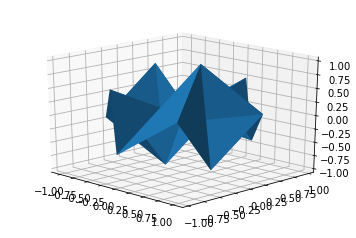

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pos = dist(13)
V = Total_energy(pos)
print('From cambridge, the minimum energy of a 13 atom cluster is\n',V,'\n\nThe geometry of a 13 atom cluster is shown here')

# for plot
X,Y,Z = positions(13)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z)
ax.view_init(elev=20, azim=315)
plt.show()


The geometry of the 13 atom cluster is isocahedral.<sup>[1]<sup>


## <center>Forest diagram of 13 atoms<sup>[1]<sup>


![Image of 13Forrest](http://doye.chem.ox.ac.uk/research/forest/treeLJ13.gif)

The distance between the 3 lowest minima and the global minima is about 3, therefore I predict that success will be found in setting the Temperature parameter to 3.  I use 10 iterations here to see if the minimum is successfully predicted quickly.

In [63]:
LjN(13,10,3,3) #Small T Small Step  FAILURE

basinhopping step 0: f -40.087
basinhopping step 1: f -40.087 trial_f -30.8386 accepted 0  lowest_f -40.087
basinhopping step 2: f -40.087 trial_f -37.234 accepted 0  lowest_f -40.087
basinhopping step 3: f -37.498 trial_f -37.498 accepted 1  lowest_f -40.087
basinhopping step 4: f -38.1039 trial_f -38.1039 accepted 1  lowest_f -40.087
basinhopping step 5: f -39.5371 trial_f -39.5371 accepted 1  lowest_f -40.087
basinhopping step 6: f -39.7171 trial_f -39.7171 accepted 1  lowest_f -40.087
basinhopping step 7: f -40.6046 trial_f -40.6046 accepted 1  lowest_f -40.6046
found new global minimum on step 7 with function value -40.6046
basinhopping step 8: f -40.6046 trial_f -38.6542 accepted 0  lowest_f -40.6046
basinhopping step 9: f -40.6046 trial_f -36.2178 accepted 0  lowest_f -40.6046
basinhopping step 10: f -40.6155 trial_f -40.6155 accepted 1  lowest_f -40.6155
found new global minimum on step 10 with function value -40.6155


In [64]:
LjN(13,10,10,3)  #Large T Small Step   FAILURE

basinhopping step 0: f -39.1431
basinhopping step 1: f -39.1431 trial_f -38.493 accepted 0  lowest_f -39.1431
basinhopping step 2: f -41.472 trial_f -41.472 accepted 1  lowest_f -41.472
found new global minimum on step 2 with function value -41.472
basinhopping step 3: f -40.7285 trial_f -40.7285 accepted 1  lowest_f -41.472
basinhopping step 4: f -40.7285 trial_f -38.7697 accepted 0  lowest_f -41.472
basinhopping step 5: f -37.6294 trial_f -37.6294 accepted 1  lowest_f -41.472
basinhopping step 6: f -39.0454 trial_f -39.0454 accepted 1  lowest_f -41.472
basinhopping step 7: f -39.7966 trial_f -39.7966 accepted 1  lowest_f -41.472
basinhopping step 8: f -39.7522 trial_f -39.7522 accepted 1  lowest_f -41.472
basinhopping step 9: f -39.7522 trial_f -38.894 accepted 0  lowest_f -41.472
basinhopping step 10: f -38.5626 trial_f -38.5626 accepted 1  lowest_f -41.472


In [62]:
LjN(13,10,10,10) #Large T Large Step  FAILURE

basinhopping step 0: f -40.6702
basinhopping step 1: f -39.5451 trial_f -39.5451 accepted 1  lowest_f -40.6702
basinhopping step 2: f -39.5451 trial_f -32.2116 accepted 0  lowest_f -40.6702
basinhopping step 3: f -40.4333 trial_f -40.4333 accepted 1  lowest_f -40.6702
basinhopping step 4: f -41.3944 trial_f -41.3944 accepted 1  lowest_f -41.3944
found new global minimum on step 4 with function value -41.3944
basinhopping step 5: f -41.3944 trial_f -33.6949 accepted 0  lowest_f -41.3944
basinhopping step 6: f -41.3944 trial_f -32.8131 accepted 0  lowest_f -41.3944
basinhopping step 7: f -41.3944 trial_f -1.20234 accepted 0  lowest_f -41.3944
basinhopping step 8: f -39.7522 trial_f -39.7522 accepted 1  lowest_f -41.3944
basinhopping step 9: f -39.7711 trial_f -39.7711 accepted 1  lowest_f -41.3944
basinhopping step 10: f -38.6336 trial_f -38.6336 accepted 1  lowest_f -41.3944


In [61]:
LjN(13,10,3,10) #Small T Large Step SUCCESS

basinhopping step 0: f -40.6738
basinhopping step 1: f -40.6738 trial_f -37.7502 accepted 0  lowest_f -40.6738
basinhopping step 2: f -40.6738 trial_f -36.4207 accepted 0  lowest_f -40.6738
basinhopping step 3: f -37.1478 trial_f -37.1478 accepted 1  lowest_f -40.6738
basinhopping step 4: f -44.3268 trial_f -44.3268 accepted 1  lowest_f -44.3268
found new global minimum on step 4 with function value -44.3268
basinhopping step 5: f -44.3268 trial_f -38.7377 accepted 0  lowest_f -44.3268
basinhopping step 6: f -44.3268 trial_f -39.7711 accepted 0  lowest_f -44.3268
basinhopping step 7: f -44.3268 trial_f -39.5467 accepted 0  lowest_f -44.3268
basinhopping step 8: f -44.3268 trial_f -39.6541 accepted 0  lowest_f -44.3268
basinhopping step 9: f -44.3268 trial_f -44.3268 accepted 1  lowest_f -44.3268
found new global minimum on step 9 with function value -44.3268
basinhopping step 10: f -44.3268 trial_f -38.0753 accepted 0  lowest_f -44.3268


In [65]:
LjN(13,10,1,10) #Smallest T same step  FAILURE

basinhopping step 0: f -40.6155
basinhopping step 1: f -39.6355 trial_f -39.6355 accepted 1  lowest_f -40.6155
basinhopping step 2: f -39.2522 trial_f -39.2522 accepted 1  lowest_f -40.6155
basinhopping step 3: f -39.2522 trial_f -36.4714 accepted 0  lowest_f -40.6155
basinhopping step 4: f -39.2522 trial_f -32.225 accepted 0  lowest_f -40.6155
basinhopping step 5: f -39.2522 trial_f -38.4283 accepted 0  lowest_f -40.6155
basinhopping step 6: f -39.2522 trial_f -7.43986 accepted 0  lowest_f -40.6155
basinhopping step 7: f -39.2522 trial_f -38.5514 accepted 0  lowest_f -40.6155
basinhopping step 8: f -39.7966 trial_f -39.7966 accepted 1  lowest_f -40.6155
basinhopping step 9: f -38.8058 trial_f -38.8058 accepted 1  lowest_f -40.6155
basinhopping step 10: f -38.8058 trial_f -38.5614 accepted 0  lowest_f -40.6155


In [66]:
LjN(13,10,2,10) #Smaller T same step failure

basinhopping step 0: f -41.472
basinhopping step 1: f -41.472 trial_f -39.9654 accepted 0  lowest_f -41.472
basinhopping step 2: f -40.5413 trial_f -40.5413 accepted 1  lowest_f -41.472
basinhopping step 3: f -40.5413 trial_f -31.5287 accepted 0  lowest_f -41.472
basinhopping step 4: f -40.5413 trial_f -38.9232 accepted 0  lowest_f -41.472
basinhopping step 5: f -40.5413 trial_f -33.7908 accepted 0  lowest_f -41.472
basinhopping step 6: f -40.5413 trial_f -2.08298 accepted 0  lowest_f -41.472
basinhopping step 7: f -39.1972 trial_f -39.1972 accepted 1  lowest_f -41.472
basinhopping step 8: f -39.6355 trial_f -39.6355 accepted 1  lowest_f -41.472
basinhopping step 9: f -39.6355 trial_f -36.3949 accepted 0  lowest_f -41.472
basinhopping step 10: f -39.6355 trial_f -19.2077 accepted 0  lowest_f -41.472


In [67]:
LjN(13,10,4,10)  #Slightly larger T same step  FAILURE

basinhopping step 0: f -39.7522
basinhopping step 1: f -39.5467 trial_f -39.5467 accepted 1  lowest_f -39.7522
basinhopping step 2: f -39.5467 trial_f -38.7114 accepted 0  lowest_f -39.7522
basinhopping step 3: f -40.0751 trial_f -40.0751 accepted 1  lowest_f -40.0751
found new global minimum on step 3 with function value -40.0751
basinhopping step 4: f -40.0751 trial_f -13.7045 accepted 0  lowest_f -40.0751
basinhopping step 5: f -39.6749 trial_f -39.6749 accepted 1  lowest_f -40.0751
basinhopping step 6: f -39.6749 trial_f -37.9676 accepted 0  lowest_f -40.0751
basinhopping step 7: f -30.9202 trial_f -30.9202 accepted 1  lowest_f -40.0751
basinhopping step 8: f -30.922 trial_f -30.922 accepted 1  lowest_f -40.0751
basinhopping step 9: f -30.922 trial_f -29.8424 accepted 0  lowest_f -40.0751
basinhopping step 10: f -31.4269 trial_f -31.4269 accepted 1  lowest_f -40.0751


In [68]:
LjN(13,10,3,9)  # 3T 9 Step FAILURE

basinhopping step 0: f -36.6391
basinhopping step 1: f -36.6391 trial_f -34.3169 accepted 0  lowest_f -36.6391
basinhopping step 2: f -38.5263 trial_f -38.5263 accepted 1  lowest_f -38.5263
found new global minimum on step 2 with function value -38.5263
basinhopping step 3: f -38.5263 trial_f -35.4462 accepted 0  lowest_f -38.5263
basinhopping step 4: f -38.5263 trial_f -1.20954 accepted 0  lowest_f -38.5263
basinhopping step 5: f -38.8593 trial_f -38.8593 accepted 1  lowest_f -38.8593
found new global minimum on step 5 with function value -38.8593
basinhopping step 6: f -38.8593 trial_f -38.5263 accepted 0  lowest_f -38.8593
basinhopping step 7: f -37.7233 trial_f -37.7233 accepted 1  lowest_f -38.8593
basinhopping step 8: f -36.3768 trial_f -36.3768 accepted 1  lowest_f -38.8593
basinhopping step 9: f -37.5036 trial_f -37.5036 accepted 1  lowest_f -38.8593
basinhopping step 10: f -39.4307 trial_f -39.4307 accepted 1  lowest_f -39.4307
found new global minimum on step 10 with function

In [69]:
LjN(13,10,3,11) #3T 11 Step FAILURE

basinhopping step 0: f -39.4062
basinhopping step 1: f -39.4062 trial_f -34.3004 accepted 0  lowest_f -39.4062
basinhopping step 2: f -40.7285 trial_f -40.7285 accepted 1  lowest_f -40.7285
found new global minimum on step 2 with function value -40.7285
basinhopping step 3: f -38.5476 trial_f -38.5476 accepted 1  lowest_f -40.7285
basinhopping step 4: f -38.5476 trial_f -35.2209 accepted 0  lowest_f -40.7285
basinhopping step 5: f -38.5476 trial_f -30.4468 accepted 0  lowest_f -40.7285
basinhopping step 6: f -38.5476 trial_f -29.7585 accepted 0  lowest_f -40.7285
basinhopping step 7: f -38.5476 trial_f -13.1039 accepted 0  lowest_f -40.7285
basinhopping step 8: f -38.5476 trial_f -1.95944 accepted 0  lowest_f -40.7285
basinhopping step 9: f -38.5476 trial_f -27.5955 accepted 0  lowest_f -40.7285
basinhopping step 10: f -37.7746 trial_f -37.7746 accepted 1  lowest_f -40.7285


It seems that my prediction was correct in that the Temperature value is optimal for finding the global minimum as a relation between the next lowest energies.  The step size might be a certain proportion of T to find success.

## <center>19 Atoms

From Cambridge, the minimum energy of a 19 atom cluster is
 -72.6597824338 

The geometry of a 19 atom cluster is shown here


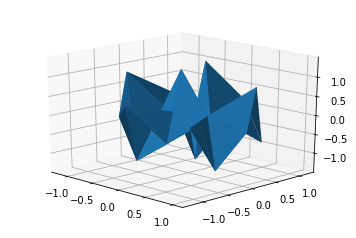

In [46]:
pos = dist(19)
V = Total_energy(pos)
print('From Cambridge, the minimum energy of a 19 atom cluster is\n',V,'\n\nThe geometry of a 19 atom cluster is shown here')

# for plot
X,Y,Z = positions(19)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z)
ax.view_init(elev=20, azim=315)
plt.show()


The geometry of a 19 atom cluter is isocahedral.<sup>[1]<sup>

## <center>Forest diagram of 19 atoms<sup>[1]<sup>


![Image of 19Forrest](http://doye.chem.ox.ac.uk/research/forest/treeLJ19.gif)

In [76]:
LjN(19,10,3,10) # 3 temp 10 step close

basinhopping step 0: f -65.1435
basinhopping step 1: f -65.1435 trial_f -62.9488 accepted 0  lowest_f -65.1435
basinhopping step 2: f -67.9945 trial_f -67.9945 accepted 1  lowest_f -67.9945
found new global minimum on step 2 with function value -67.9945
basinhopping step 3: f -67.9945 trial_f -62.2026 accepted 0  lowest_f -67.9945
basinhopping step 4: f -67.9945 trial_f -66.9953 accepted 0  lowest_f -67.9945
basinhopping step 5: f -67.9945 trial_f -60.7336 accepted 0  lowest_f -67.9945
basinhopping step 6: f -70.8187 trial_f -70.8187 accepted 1  lowest_f -70.8187
found new global minimum on step 6 with function value -70.8187
basinhopping step 7: f -70.8187 trial_f -2.51009 accepted 0  lowest_f -70.8187
basinhopping step 8: f -70.8187 trial_f -62.6658 accepted 0  lowest_f -70.8187
basinhopping step 9: f -70.8187 trial_f -64.9391 accepted 0  lowest_f -70.8187
basinhopping step 10: f -70.8187 trial_f -1.00891 accepted 0  lowest_f -70.8187


In [77]:
LjN(19,10,10,3) # 10 temp 3 step FAILURE

basinhopping step 0: f -58.2619
basinhopping step 1: f -58.4599 trial_f -58.4599 accepted 1  lowest_f -58.4599
found new global minimum on step 1 with function value -58.4599
basinhopping step 2: f -58.5031 trial_f -58.5031 accepted 1  lowest_f -58.5031
found new global minimum on step 2 with function value -58.5031
basinhopping step 3: f -53.2316 trial_f -53.2316 accepted 1  lowest_f -58.5031
basinhopping step 4: f -56.4412 trial_f -56.4412 accepted 1  lowest_f -58.5031
basinhopping step 5: f -58.2257 trial_f -58.2257 accepted 1  lowest_f -58.5031
basinhopping step 6: f -52.5837 trial_f -52.5837 accepted 1  lowest_f -58.5031
basinhopping step 7: f -51.9734 trial_f -51.9734 accepted 1  lowest_f -58.5031
basinhopping step 8: f -56.8157 trial_f -56.8157 accepted 1  lowest_f -58.5031
basinhopping step 9: f -53.9074 trial_f -53.9074 accepted 1  lowest_f -58.5031
basinhopping step 10: f -52.5654 trial_f -52.5654 accepted 1  lowest_f -58.5031


In [78]:
LjN(19,10,4,10)

basinhopping step 0: f -67.9408
basinhopping step 1: f -67.9408 trial_f -64.9228 accepted 0  lowest_f -67.9408
basinhopping step 2: f -67.9408 trial_f -59.7186 accepted 0  lowest_f -67.9408
basinhopping step 3: f -69.4018 trial_f -69.4018 accepted 1  lowest_f -69.4018
found new global minimum on step 3 with function value -69.4018
basinhopping step 4: f -69.4018 trial_f -60.2527 accepted 0  lowest_f -69.4018
basinhopping step 5: f -69.9853 trial_f -69.9853 accepted 1  lowest_f -69.9853
found new global minimum on step 5 with function value -69.9853
basinhopping step 6: f -69.9853 trial_f -63.5819 accepted 0  lowest_f -69.9853
basinhopping step 7: f -69.9853 trial_f -64.8436 accepted 0  lowest_f -69.9853
basinhopping step 8: f -69.9853 trial_f -67.1286 accepted 0  lowest_f -69.9853
basinhopping step 9: f -69.9853 trial_f -64.8747 accepted 0  lowest_f -69.9853
basinhopping step 10: f -67.0756 trial_f -67.0756 accepted 1  lowest_f -69.9853


In [79]:
LjN(19,10,4,11)

basinhopping step 0: f -65.2708
basinhopping step 1: f -65.2708 trial_f -62.9913 accepted 0  lowest_f -65.2708
basinhopping step 2: f -65.2708 trial_f -64.2502 accepted 0  lowest_f -65.2708
basinhopping step 3: f -65.2708 trial_f -56.8582 accepted 0  lowest_f -65.2708
basinhopping step 4: f -65.2708 trial_f -58.7371 accepted 0  lowest_f -65.2708
basinhopping step 5: f -65.0529 trial_f -65.0529 accepted 1  lowest_f -65.2708
basinhopping step 6: f -65.0529 trial_f -59.9941 accepted 0  lowest_f -65.2708
basinhopping step 7: f -65.0529 trial_f -61.5045 accepted 0  lowest_f -65.2708
basinhopping step 8: f -65.0668 trial_f -65.0668 accepted 1  lowest_f -65.2708
basinhopping step 9: f -68.4992 trial_f -68.4992 accepted 1  lowest_f -68.4992
found new global minimum on step 9 with function value -68.4992
basinhopping step 10: f -68.4992 trial_f -56.7744 accepted 0  lowest_f -68.4992


In [80]:
LjN(19,10,2.5,10)

basinhopping step 0: f -64.0126
basinhopping step 1: f -63.0042 trial_f -63.0042 accepted 1  lowest_f -64.0126
basinhopping step 2: f -61.0643 trial_f -61.0643 accepted 1  lowest_f -64.0126
basinhopping step 3: f -60.175 trial_f -60.175 accepted 1  lowest_f -64.0126
basinhopping step 4: f -67.7814 trial_f -67.7814 accepted 1  lowest_f -67.7814
found new global minimum on step 4 with function value -67.7814
basinhopping step 5: f -62.8958 trial_f -62.8958 accepted 1  lowest_f -67.7814
basinhopping step 6: f -66.2009 trial_f -66.2009 accepted 1  lowest_f -67.7814
basinhopping step 7: f -66.2009 trial_f -4.88142 accepted 0  lowest_f -67.7814
basinhopping step 8: f -67.0395 trial_f -67.0395 accepted 1  lowest_f -67.7814
basinhopping step 9: f -65.22 trial_f -65.22 accepted 1  lowest_f -67.7814
basinhopping step 10: f -63.6944 trial_f -63.6944 accepted 1  lowest_f -67.7814


In [81]:
LjN(19,10,0.5,10)

basinhopping step 0: f -63.9738
basinhopping step 1: f -67.6198 trial_f -67.6198 accepted 1  lowest_f -67.6198
found new global minimum on step 1 with function value -67.6198
basinhopping step 2: f -67.6198 trial_f -64.0701 accepted 0  lowest_f -67.6198
basinhopping step 3: f -67.6198 trial_f -2.00171 accepted 0  lowest_f -67.6198
basinhopping step 4: f -67.6198 trial_f -66.0696 accepted 0  lowest_f -67.6198
basinhopping step 5: f -67.6198 trial_f -48.3349 accepted 0  lowest_f -67.6198
basinhopping step 6: f -67.6198 trial_f -66.2756 accepted 0  lowest_f -67.6198
basinhopping step 7: f -67.6198 trial_f -57.9198 accepted 0  lowest_f -67.6198
basinhopping step 8: f -67.6198 trial_f -62.7925 accepted 0  lowest_f -67.6198
basinhopping step 9: f -67.6198 trial_f -1.00515 accepted 0  lowest_f -67.6198
basinhopping step 10: f -69.9235 trial_f -69.9235 accepted 1  lowest_f -69.9235
found new global minimum on step 10 with function value -69.9235


In [82]:
LjN(19,10,0.5,5)

basinhopping step 0: f -67.0532
basinhopping step 1: f -67.0532 trial_f -66.6352 accepted 0  lowest_f -67.0532
basinhopping step 2: f -68.6878 trial_f -68.6878 accepted 1  lowest_f -68.6878
found new global minimum on step 2 with function value -68.6878
basinhopping step 3: f -70.7257 trial_f -70.7257 accepted 1  lowest_f -70.7257
found new global minimum on step 3 with function value -70.7257
basinhopping step 4: f -70.7257 trial_f -70.148 accepted 0  lowest_f -70.7257
basinhopping step 5: f -70.7257 trial_f -67.078 accepted 0  lowest_f -70.7257
basinhopping step 6: f -70.7257 trial_f -59.2501 accepted 0  lowest_f -70.7257
basinhopping step 7: f -70.7257 trial_f -66.1769 accepted 0  lowest_f -70.7257
basinhopping step 8: f -70.7257 trial_f -65.4445 accepted 0  lowest_f -70.7257
basinhopping step 9: f -70.7257 trial_f -67.6035 accepted 0  lowest_f -70.7257
basinhopping step 10: f -70.7257 trial_f -69.3888 accepted 0  lowest_f -70.7257


In [102]:
LjN(19,10,30.3,3)

basinhopping step 0: f -66.5441
basinhopping step 1: f -66.6665 trial_f -66.6665 accepted 1  lowest_f -66.6665
found new global minimum on step 1 with function value -66.6665
basinhopping step 2: f -64.5213 trial_f -64.5213 accepted 1  lowest_f -66.6665
basinhopping step 3: f -67.6645 trial_f -67.6645 accepted 1  lowest_f -67.6645
found new global minimum on step 3 with function value -67.6645
basinhopping step 4: f -67.2739 trial_f -67.2739 accepted 1  lowest_f -67.6645
basinhopping step 5: f -67.559 trial_f -67.559 accepted 1  lowest_f -67.6645
basinhopping step 6: f -68.4112 trial_f -68.4112 accepted 1  lowest_f -68.4112
found new global minimum on step 6 with function value -68.4112
basinhopping step 7: f -68.4112 trial_f -67.5747 accepted 0  lowest_f -68.4112
basinhopping step 8: f -70.8187 trial_f -70.8187 accepted 1  lowest_f -70.8187
found new global minimum on step 8 with function value -70.8187
basinhopping step 9: f -68.3268 trial_f -68.3268 accepted 1  lowest_f -70.8187
bas

In [103]:
#It seems that we need more iterations to compute 19 atoms with these parameters

LjN(19,20,30.3,3)  # Success

basinhopping step 0: f -66.2559
basinhopping step 1: f -66.1111 trial_f -66.1111 accepted 1  lowest_f -66.2559
basinhopping step 2: f -66.1111 trial_f -43.1411 accepted 0  lowest_f -66.2559
basinhopping step 3: f -71.0827 trial_f -71.0827 accepted 1  lowest_f -71.0827
found new global minimum on step 3 with function value -71.0827
basinhopping step 4: f -61.554 trial_f -61.554 accepted 1  lowest_f -71.0827
basinhopping step 5: f -72.6598 trial_f -72.6598 accepted 1  lowest_f -72.6598
found new global minimum on step 5 with function value -72.6598
basinhopping step 6: f -67.5287 trial_f -67.5287 accepted 1  lowest_f -72.6598
basinhopping step 7: f -64.0469 trial_f -64.0469 accepted 1  lowest_f -72.6598
basinhopping step 8: f -64.0469 trial_f -55.2722 accepted 0  lowest_f -72.6598
basinhopping step 9: f -61.7837 trial_f -61.7837 accepted 1  lowest_f -72.6598
basinhopping step 10: f -63.1689 trial_f -63.1689 accepted 1  lowest_f -72.6598
basinhopping step 11: f -52.0792 trial_f -52.0792 a

There was no porportion between step size and temperature given by the previous trials.  Instead I can infer that as more atoms are added to the cluster, the temperature must increase, and the step size must decrease while the number of iterations needed to find the minimum increases.

## <center>15 atoms

According to my hypothesis, 15 atoms must have a T value intermediate between 3 and 30 and the step in the intermediate of 3 and 10.

From Cambridge, the minimum energy of a 15 atom cluster is
 -52.3226272461 

The geometry of a 15 atom cluster is shown here


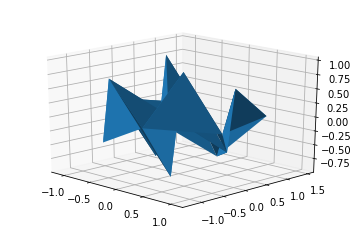

In [110]:
pos = dist(15)
V = Total_energy(pos)
print('From Cambridge, the minimum energy of a 15 atom cluster is\n',V,'\n\nThe geometry of a 15 atom cluster is shown here')

# for plot
X,Y,Z = positions(15)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z)
ax.view_init(elev=20, azim=315)
plt.show()

In [112]:
LjN(15,15,15,6) ## success

basinhopping step 0: f -51.3674
basinhopping step 1: f -52.3226 trial_f -52.3226 accepted 1  lowest_f -52.3226
found new global minimum on step 1 with function value -52.3226
basinhopping step 2: f -52.3226 trial_f -46.1392 accepted 0  lowest_f -52.3226
basinhopping step 3: f -52.3226 trial_f -43.233 accepted 0  lowest_f -52.3226
basinhopping step 4: f -52.3226 trial_f -47.1519 accepted 0  lowest_f -52.3226
basinhopping step 5: f -52.3226 trial_f -44.3519 accepted 0  lowest_f -52.3226
basinhopping step 6: f -47.6763 trial_f -47.6763 accepted 1  lowest_f -52.3226
basinhopping step 7: f -48.6384 trial_f -48.6384 accepted 1  lowest_f -52.3226
basinhopping step 8: f -45.9716 trial_f -45.9716 accepted 1  lowest_f -52.3226
basinhopping step 9: f -47.39 trial_f -47.39 accepted 1  lowest_f -52.3226
basinhopping step 10: f -47.39 trial_f -43.0795 accepted 0  lowest_f -52.3226
basinhopping step 11: f -44.6552 trial_f -44.6552 accepted 1  lowest_f -52.3226
basinhopping step 12: f -47.011 trial_f 

So far it looks like that as the temperature increases with the number of atoms and the step size decreases

## <center>38 Atoms (2 minimums and 2 geometries) (Bonus)

From cambridge, the true minimum energy of a 38 atom cluster is
 -173.928426512 

The geometry of a 38 atom cluster is shown here


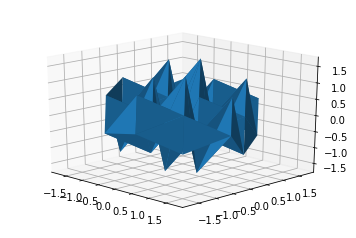

In [48]:
pos = dist(38)
V = Total_energy(pos)
print('From cambridge, the true minimum energy of a 38 atom cluster is\n',V,'\n\nThe geometry of a 38 atom cluster is shown here')

# for plot
X,Y,Z = positions(38)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z)
ax.view_init(elev=20, azim=315)
plt.show()


For this minimum the geomotry of the cluster is a face-centred-cubic truncated octahedron.  This minimum is harder to compute as the other minimum has a much higher probability of being found.

In [115]:
import os
os.chdir(r'''C:\Users\david\Desktop\phys-300\2017-cmp''')
my_data = np.genfromtxt('lj_data.csv', delimiter=',')


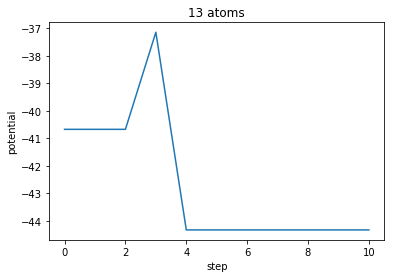

In [133]:
import matplotlib.pyplot as plt

atom13 = my_data[:,0]
atom13 = atom13[~np.isnan(atom13)]
x1 = np.linspace(0,10,11)

plt.plot(x1,atom13)
plt.xlabel('step')
plt.ylabel('potential')
plt.title('13 atoms')
plt.show()

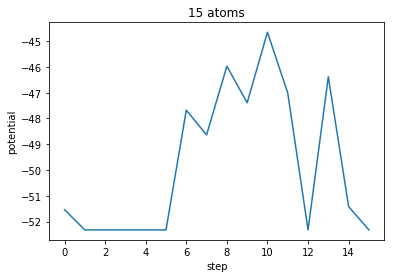

In [134]:
atom15 = my_data[:,1]
atom15 = atom15[~np.isnan(atom15)]
x1 = np.linspace(0,15,16)

plt.plot(x1,atom15)
plt.xlabel('step')
plt.ylabel('potential')
plt.title('15 atoms')
plt.show()

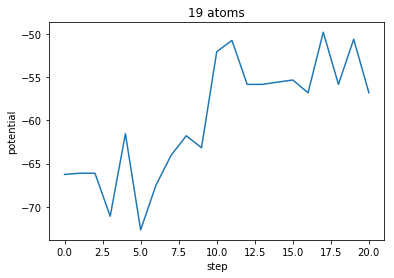

In [136]:
atom19 = my_data[:,2]
x1 = np.linspace(0,20,21)

plt.plot(x1,atom19)
plt.xlabel('step')
plt.ylabel('potential')
plt.title('19 atoms')
plt.show()

From cambridge, the other commonly found minimum energy of a 38 atom cluster is
 -173.252378416 

The geometry of this 38 atom cluster is shown here


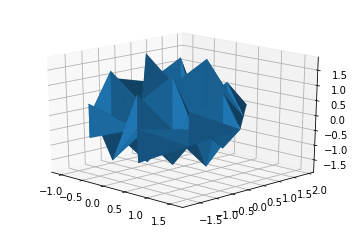

In [51]:
def pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/38i'):
    url_address = address
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)  
def positions(N_atoms=38):
    pos = pos_from_url()
    pos = np.reshape(pos,[N_atoms,3])
    return pos[:,0],pos[:,1],pos[:,2]
def distance(N_atoms=38):
    pos = pos_from_url()
    pos = np.reshape(pos,[N_atoms,3])
    distance = cdist(pos,pos,'euclidean')
    iu1 = np.triu_indices(N_atoms)
    distance = distance[iu1]
    index = np.argwhere(distance==0)
    distance = np.delete(distance,index)
    return distance

pos = distance()
V = Total_energy(pos)
print('From cambridge, the other commonly found minimum energy of a 38 atom cluster is\n',V,'\n\nThe geometry of this 38 atom cluster is shown here')

# for plot
X,Y,Z = positions()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z)
ax.view_init(elev=20, azim=315)
plt.show()

<p>The geometry of this minimum is an isocahedral funnel, which is why the computated minimum will most likely fall within this "basin"<sup>[4]<sup><p>

## <center>Forest diagram of 38 atoms<sup>[1]<sup>

![Image of 38Forrest](http://doye.chem.ox.ac.uk/research/forest/treeLJ38.gif)

In [58]:
LjN(38,120,5,10)

basinhopping step 0: f -162.364
basinhopping step 1: f -151.673 trial_f -151.673 accepted 1  lowest_f -162.364
basinhopping step 2: f -151.673 trial_f -147.846 accepted 0  lowest_f -162.364
basinhopping step 3: f -160.277 trial_f -160.277 accepted 1  lowest_f -162.364
basinhopping step 4: f -160.277 trial_f -127.441 accepted 0  lowest_f -162.364
basinhopping step 5: f -160.277 trial_f -52.9585 accepted 0  lowest_f -162.364
basinhopping step 6: f -164.461 trial_f -164.461 accepted 1  lowest_f -164.461
found new global minimum on step 6 with function value -164.461
basinhopping step 7: f -162.886 trial_f -162.886 accepted 1  lowest_f -164.461
basinhopping step 8: f -160.583 trial_f -160.583 accepted 1  lowest_f -164.461
basinhopping step 9: f -162.014 trial_f -162.014 accepted 1  lowest_f -164.461
basinhopping step 10: f -160.518 trial_f -160.518 accepted 1  lowest_f -164.461
basinhopping step 11: f -160.518 trial_f -157.766 accepted 0  lowest_f -164.461
basinhopping step 12: f -160.518 

The experiments show that as the number of atoms increases in the cluster, the temperature parameter should increase rapidly, while the step size decreases at a slower rate.  Finding the minima of the clusters becomes much more difficult as the numbers of atoms grows, meaning that more iterations are needed.  Certain values have multiple minima that are similar in value but drastically different in geometry, which will need more of a "shotgun" approach with a high T and high step with many iterations.

## <center>Speed Test

In [139]:
%timeit LjN(13,10,3,10)

1 loop, best of 3: 16.8 s per loop


## <center>References
 
Doye, J. P., Miller, M. A., & Wales, D. J. (n.d.). Lennard-Jones Clusters. 
http://doye.chem.ox.ac.uk/research/forest/LJ.html<sup>[1]<sup>

Scipy.optimize.basinhopping. (n.d.). Retrieved November 10, 2017, from https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.basinhopping.html<sup>[2]<sup>

Wales, D. J., & Doye, J. P. (1997). Global Optimization by Basin-Hopping and the Lowest Energy Structures of Lennard-Jones 
Clusters Containing up to 110 Atoms. The Journal of Physical Chemistry A, 101(28), 5111-5116.<sup>[3]<sup>

Wales Group. (n.d.). Table of Lennard-Jones Clusters Minimum Values. http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html<sup>[4]<sup>

Lennard-Jones, J. E. (1931). "Cohesion". Proceedings of the Physical Society<sup>[5]<sup>